
# NLP, DS-поток
## Задание 1
### Embeddings. Word2Vec. Conv1D

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---
### Задача 1

В данном домашнем задании вам предлагается проанализировать и улучшить модель для задачи `Sentiment Analysis`, которую вы обучали на семинаре.

Предлагается выполнить следующие пункты:


1. **(20 баллов)** Примените стемминг или лемматизацию к датасету. Как поменялось качество?

2. **(20 баллов)** Попробуйте изменить размерность эмбеддинга на сильно большую и сильно меньшую. В качестве размеров эмбеддингов можно взять 30 и 200. Как меняется качество модели? Какая модель более склонна к переобучению и почему?

3. **(20 баллов)** Посмотрите на обученнные вами эмбеддинги у модели с маленьким размером эмбеддинга из предыдущего пункта. Для нескольких слов найдите похожие на него по косинусной мере близости.

5. **(20 баллов)** Попробуйте рассмотреть фильтры меньших размеров.
 * Рассмотрите фильтры размеров 1, 2, 3
 * Рассмотрите фильтры размеров 1, 2

 Сильно ли меняется качество модели для данной задачи? Почему?

5. **(20 баллов)** Как можно заметить, у нас не сильно большая тренировочная выборка. Попробуйте сделать аугментацию текста.

  Один из вариантов: заменять слово на синоним с какой-то вероятностью $p$. То есть с вероятностью $p$ каждое слово будет заменено на некоторый его синоним, а с вероятностью $1 - p$ слово останется как есть.


Для простоты анализа результатов стоит не применять сразу несколько улучшений, а делать их отдельно. В каждом выполняемом пункте **постройте кривую функции потерь** как для трейна, так и для валидации.

In [3]:
# фиксируем версии для воспроизводимости
# api некоторых пакетов может меняться
!pip install -U nltk==3.8.1 > null
!pip install -U gensim==4.3.2 > null
!pip install -U scipy==1.12
!pip install -U torchtext==0.17.0 > null
!pip install -U spacy==3.6.0 > null
!pip install -U portalocker==2.8.2 > null
# скачаем для использования spacy-токенайзера
!python -m spacy download en_core_web_sm > null

2025-02-23 16:25:00.375886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-23 16:25:00.398696: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-23 16:25:00.408407: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1740327902.981824     191 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740327902.982204     191 cuda_executor.cc:1015] succ

In [4]:
import numpy as np
import random
import time

from tqdm import tqdm
from IPython.display import clear_output
from matplotlib import pyplot as plt

import gensim
import nltk

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer

from collections import Counter, OrderedDict
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, DataLoader
from torch.nn.utils.rnn import pad_sequence

import torchtext
from torchtext import data, datasets
from torchtext.data.functional import to_map_style_dataset

nltk.download("punkt") # для токенизации текстов и работы с пунктуацией
nltk.download("wordnet") # для графа зависимостей между словами

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Зафиксируем random seed для воспроизводимости результатов

In [16]:
SEED = 1234
random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

Скачаем данные, представив их в виде трейна, валидации и теста.

In [17]:
train_iter, test_iter = datasets.IMDB()

train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)

# размер. обуч выборки
num_train = int(len(train_dataset) * 0.9)

train_data, valid_data = random_split(
    train_dataset,
    [num_train, len(train_dataset) - num_train],
    torch.Generator().manual_seed(SEED)
)

По желанию используйте вспомогательные функции с семинара. Вы можете их переписать и(или) дополнить, если потребуется.

In [95]:
def binary_accuracy(preds, y):
    """
    Возвращает точность модели.

    Параметры.
    1) preds — предсказания модели,
    2) y — истинные метки классов.
    """

    # округляет предсказания до ближайшего integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

def train(model, iterator, optimizer, criterion, loss_history):
    """
    Функция для обучения модели на обучающем датасете и подсчёта
    её точности.

    Параметры.
    1) model — модель,
    2) iterator — итератор обучающего датасета,
    3) optimizer — класс метода оптимизации,
    4) criterion — функция потерь.
    """

    epoch_loss = 0
    epoch_acc = 0
    model.train()

    for batch_id, batch in enumerate(iterator):
        # чтобы градиент не накапливался, его нужно обнулить
        optimizer.zero_grad()
        # получим предсказания модели
        texts, labels = batch
        predictions = model(texts).squeeze(1)
        loss = criterion(predictions, labels)
        acc = binary_accuracy(predictions, labels)

        # сделаем back-propagation для подсчёта градиентов
        loss.backward()
        # выполним шаг оптимизатора
        optimizer.step()
        # обновим метрики
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        loss_history.append(loss.item())

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def evaluate(model, iterator, criterion, loss_history=None):
    """
    Функция для применения модели на валидационном/тестовом датасете и подсчёта
    её точности.

    Параметры.
    1) model — модель,
    2) iterator — итератор датасета,
    3) criterion — функция потерь.
    """

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad(): # отключим подсчёт градиентов на валидации
        for batch_id, batch in enumerate(iterator):
            inp, label = batch

            # получим предсказания
            predictions = model(inp).squeeze(1)
            # посчитаем метрики
            loss = criterion(predictions, label)
            acc = binary_accuracy(predictions, label)
            # обновим метрики
            epoch_loss += loss.item()
            epoch_acc += acc.item()
            if loss_history is not None:
                loss_history.append(loss.item())

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def epoch_time(start_time, end_time):
    """
    Функция для подсчёта времени работы одной эпохи.

    Параметры.
    1) start_time — время начала запуска,
    2) end_time — время завершения работы эпохи.
    """

    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


def training_loop(model_instance, n_epochs=10):
    """
    Функция для обучения нейронной сети.

    Параметры.
    1) model_instance — обучаемая модель,
    2) n_epochs — количество эпох.
    """

    best_valid_loss = float('inf')
    loss_history = []
    val_loss_history = []
    acc_history = []
    val_acc_history = []

    for epoch in range(n_epochs):
        start_time = time.time()
        # Обучим одну эпоху на обучающем датасете
        train_loss, train_acc = train(model_instance, train_loader, optimizer, criterion, loss_history)
        acc_history.append(train_acc)

        # Оценим точность модели на тестовом датасете
        valid_loss, valid_acc = evaluate(model_instance, valid_loader, criterion, val_loss_history)
        val_acc_history.append(valid_acc)

        # Посчитаем время работы одной эпохи
        end_time = time.time()
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        # Отобразим графики loss'ов
        clear_output(True)
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1)
        plt.plot(loss_history)
        plt.title("Train Loss")
        plt.xlabel("Номер батча")
        plt.subplot(1, 3, 2)
        plt.plot(val_loss_history, color="tab:orange")
        plt.title("Valid Loss")
        plt.xlabel("Номер батча")
        # Если значение функции потерь улучшилось, сохраним параметры модели
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model_instance.state_dict(), 'model_checkpoint.pt')

        # Отрисуем значение точности от эпохи
        plt.subplot(1, 3, 3)
        plt.plot(acc_history, label="Train")
        plt.plot(val_acc_history, label="Valid")
        plt.legend()
        plt.title("Accuracy")
        plt.xlabel("Номер эпохи")
        plt.show()

        print(f"Номер эпохи: {epoch+1:02} | Время обучения эпохи: {epoch_mins}m {epoch_secs}s")

    return acc_history, val_acc_history

__1. Предобработка данных__

Примените стемминг или лемматизацию к обучающему, валидационному и тестовому датасету.


In [19]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Вспомогательная функция

In [20]:
def get_wordnet_pos(word):
    """ Переводит POS tag в один символ для lemmatize() """

    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
  """ Леммитизирует предложение """
  return ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(text)])

Применение к датасету

In [21]:
lemmatizer = WordNetLemmatizer()

train_data = [(label, lemmatize_text(text)) for label, text in train_data]

valid_data = [(label, lemmatize_text(text)) for label, text in valid_data]

test_dataset = [(label, lemmatize_text(text)) for label, text in test_dataset]

Ограничьте словарь для модели, убрав наименее частые слова. Это сделает обучение модели менее ресурсозатратным, а также позволит избавиться от потенциальных слов с орфографическими ошибками.

In [44]:
from string import punctuation
from torchtext.data.utils import get_tokenizer


MAX_VOCAB_SIZE = 25000
tokenizer = get_tokenizer("spacy", language="en_core_web_sm")
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words("english") # стоп-слова
punc = list(punctuation) # пунктуация

counter = Counter()
for _, text in train_data:
    counter.update(
        token for token in tokenizer(text) \
        if token not in stop_words and token not in punc
    )

ordered_dict = OrderedDict(counter.most_common(MAX_VOCAB_SIZE))
vocab = torchtext.vocab.vocab(ordered_dict)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1742: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Еще один токен

In [47]:
unk_token = "<unk>"
# vocab.append_token(unk_token)
# используем по умолчанию для токенов вне словаря
vocab.set_default_index(vocab[unk_token])
UNK_IDX = vocab[unk_token]

Кодировка таргетов

In [48]:
le = LabelEncoder()

train_labels = le.fit_transform([label for label, _ in train_data])
valid_labels = le.transform([label for label, _ in valid_data])
test_labels = le.transform([label for label, _ in test_dataset])

Создайте итератор для обучающего, валидационного и тестового датасетов. Будет полезно обратить внимание на типы датасетов в Pytorch: [ссылка](https://pytorch.org/docs/stable/data.html#dataset-types).

In [32]:
def pad_collate(batch):
    """
    Формирует тензоры из токенизированных текстов и меток, а также
    дополняет последовательности токенов до макс. длины в батче с UNK_IDX
    """
    texts, labels = zip(*batch)

    # сформируем тензоры
    texts_tensors = [torch.LongTensor(t).to(DEVICE) for t in texts]
    labels_tensors = torch.FloatTensor(labels).to(DEVICE)
    # дополним до макс. длины в батче
    texts_padded = pad_sequence(
        texts_tensors,
        batch_first=True,
        padding_value=UNK_IDX
    )
    return texts_padded, labels_tensors

И сами итераторы

In [49]:
BATCH_SIZE = 64
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_texts = [vocab(tokenizer(text)) for _, text in train_data]
valid_texts = [vocab(tokenizer(text)) for _, text in valid_data]
test_texts = [vocab(tokenizer(text)) for _, text in test_dataset]

train_loader = DataLoader(
    list(zip(train_texts, train_labels)),
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=pad_collate
)

valid_loader = DataLoader(
    list(zip(valid_texts, valid_labels)),
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=pad_collate
)

test_loader = DataLoader(
    list(zip(test_texts, test_labels)),
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=pad_collate
)

Зададим модель, аналогичную той, что была на семинаре.

In [50]:
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim,
                 dropout, pad_idx):
        """
        Функция инициализации модели.

        Параметры.
        1) vocab_size — размер словаря,
        2) embedding_dim — размерность векторов-эмбеддингов,
        3) n_filters — количество свёрточных фильтров на каждом слое,
        4) filter_sizes — количество свёрточных слоёв,
        5) output_dim — размер выхода модели,
        6) dropout — вещественное число от 0 до 1, вероятность отключения нейронов,
        7) pad_idx — токен для паддинга.
        """

        super().__init__()
        # эмбеддинг-слой
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        # свёрточные слои
        self.convs = nn.ModuleList([
          nn.Conv1d(
              in_channels=embedding_dim, out_channels=n_filters,
              kernel_size=fs,
          ) for fs in filter_sizes
        ])
        # полносвязный слой для получение выхода модели
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        # dropout для регуляризации сети
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        """ Функция для получения выходов сети по текстам """

        #text.dim = [batch size, sent len]
        #embedded.dim = [batch size, sent len, emb dim]
        embedded = self.embedding(text)

        #embedded.dim = [batch size, emb dim, sent len]
        embedded = embedded.permute(0, 2, 1)

        #conved_n.dim = [batch size, n_filters, sent len - filter_sizes[n] + 1]
        conved = [F.relu(conv(embedded)) for conv in self.convs]

        #pooled_n.dim = [batch size, n_filters]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]

        #cat.dim = [batch size, n_filters * len(filter_sizes)]
        cat = self.dropout(torch.cat(pooled, dim = 1))

        return self.fc(cat)

Проинициализируйте и обучите модель.

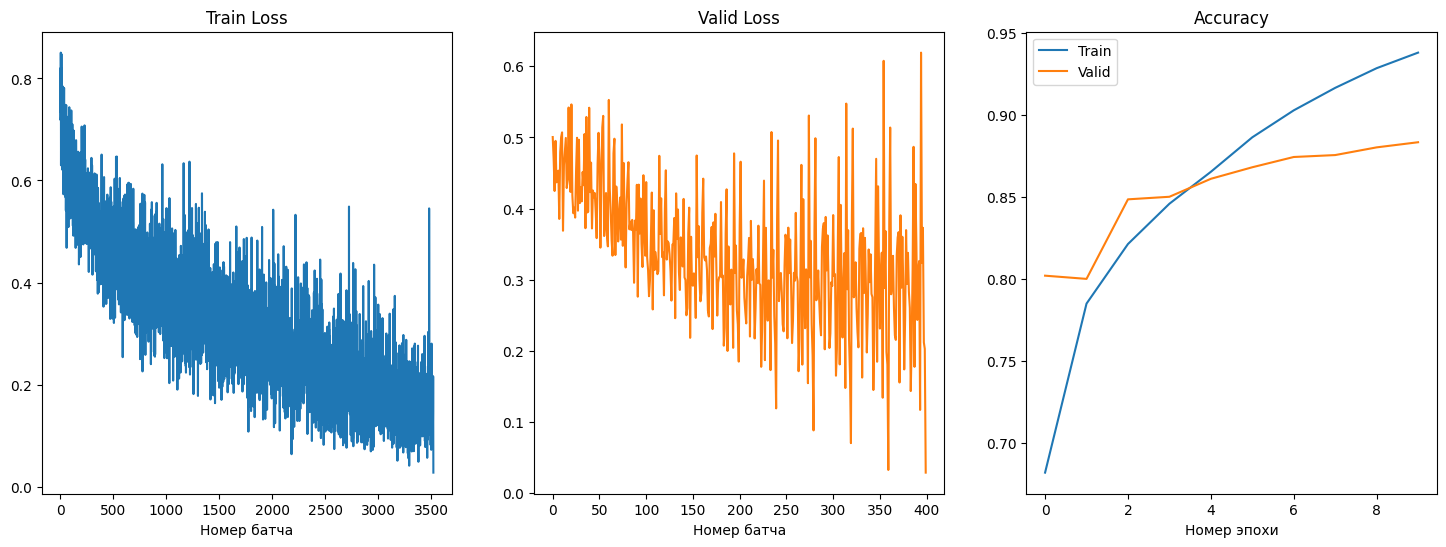

Номер эпохи: 10 | Время обучения эпохи: 0m 13s


In [51]:
INPUT_DIM = len(vocab)    # размер словаря
EMBEDDING_DIM = 100       # размерность векторов-эмбеддингов
N_FILTERS = 100           # количество свёрточных фильтров
FILTER_SIZES = [3, 4, 5]  # размеры фильтров на каждом уровне
OUTPUT_DIM = 1            # размерность выхода (сеть выдаёт вероятность для одного класса)
DROPOUT = 0.5             # вероятность dropout
PAD_IDX = UNK_IDX         # id токена для паддинга

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

optimizer = torch.optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

training_loop(model)

Посчитайте качество модели на тестовой выборке.

In [52]:
model.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.300 | Test Acc: 87.79%


По сравнению с семинаром качество почти не изменилось. Это связано с простотой задачи

__2. Изменение размера эмбеддинга__

Уменьшите размер эмбеддингов до 30. Как поменялось качество модели?

*Замечание.* Если в предыдущем пункте вы перезаписали датасеты, применив к ним стемминг или лемматизацию, то их нужно скачать заново. Обратите внимание также на используемый словарь.

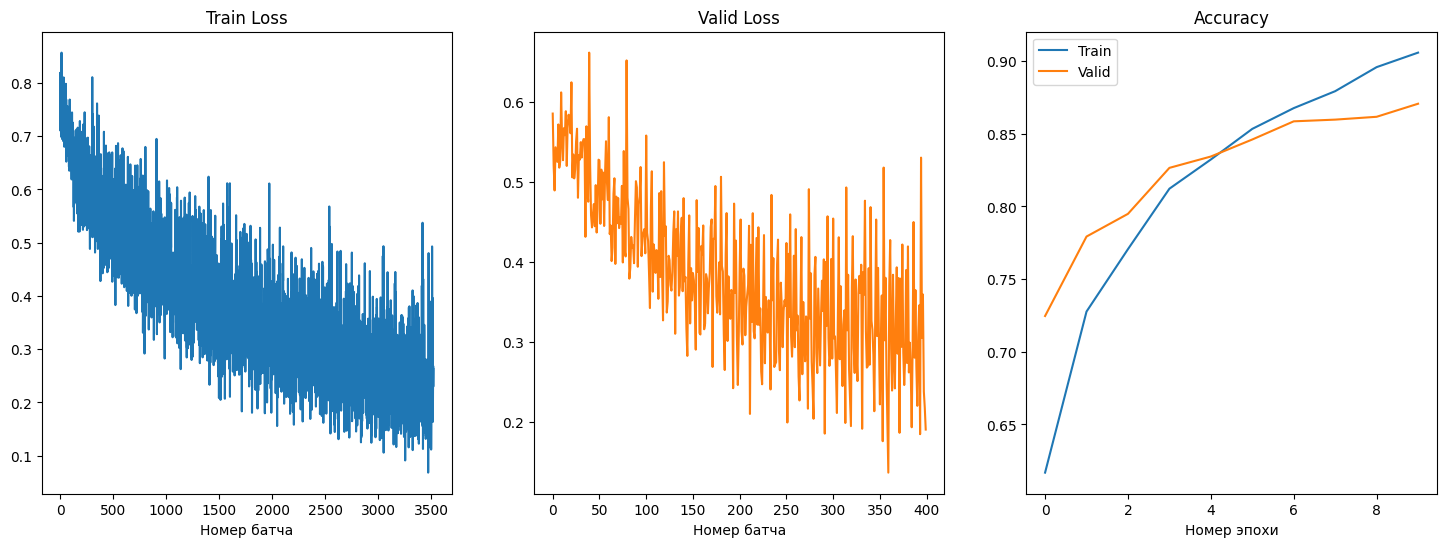

Номер эпохи: 10 | Время обучения эпохи: 0m 7s


In [53]:
EMBEDDING_DIM = 30

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

optimizer = torch.optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

training_loop(model)

Качество

In [54]:
model.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.326 | Test Acc: 86.02%


Теперь  увеличьте размер эмбеддингов до 200. Как поменялось качество модели в сравнении с предыдущей? Какая модель более склонна к переобучению и почему?

Сделайте выводы.

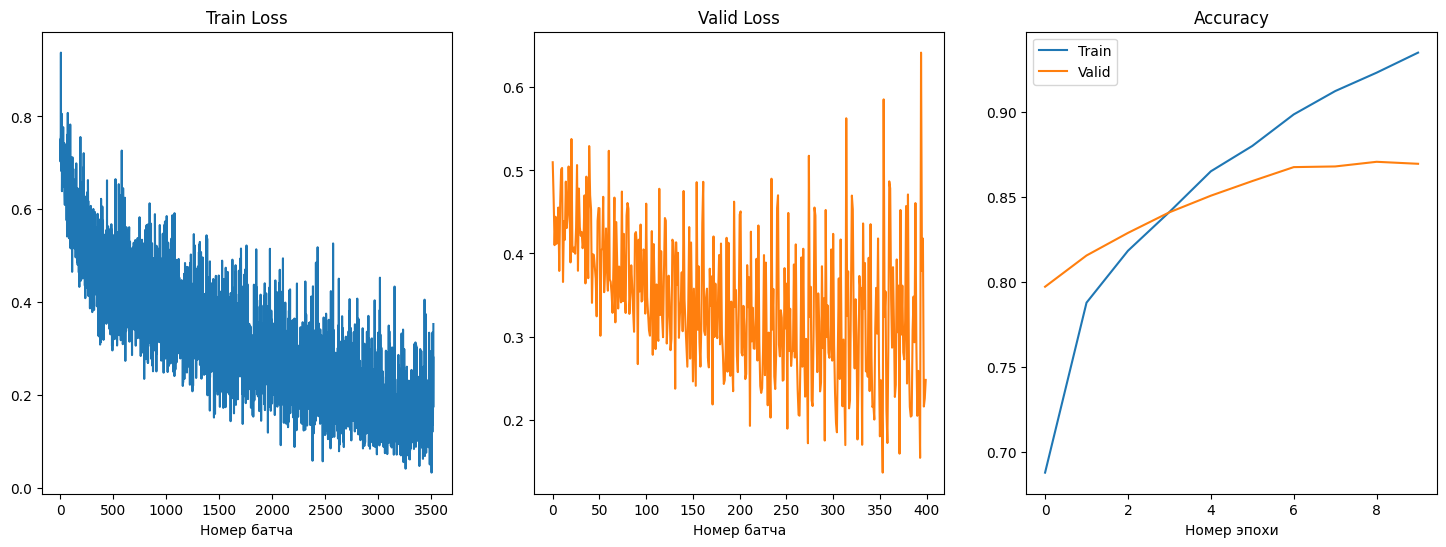

Номер эпохи: 10 | Время обучения эпохи: 0m 13s


In [55]:
EMBEDDING_DIM = 100

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

optimizer = torch.optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

training_loop(model)

Качество

In [56]:
model.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.304 | Test Acc: 87.60%


**Выводы**

Сильно большой разницы между качествами моделями нет - задача слишком простая. Однако, большие эмбеддинги дают чуть большую точность, что логично.

Большие эмбеддинги - большая переобучаемость модели.

__3. Нахождение близких слов по эмбеддингам.__

Напишите функцию, считающую [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) между двумя векторами. Именно косинусная мера близости очень часто используется в качестве меры схожести двух эмбеддинг-векторов.

In [64]:
def cosine_similarity(a, b):
    dot_product = torch.dot(a, b)
    
    norm_product = torch.norm(a) * torch.norm(b)
    
    if norm_product == 0:
        return 0.0
    
    return (dot_product / norm_product).item()

Напишите функцию, которая принимает на вход слово word и $k$ и возвращает $k$ наиболее похожих на word слов.

Эмбеддинги для каждого слова должны быть получены с помощью матрицы эмбеддингов из Embedding слоя вашей модели. В качестве модели возьмите модель из предыдущего пункта с маленьким размером эмбеддинга.

Чтобы по слову получить его индекс в словаре и обратно можно воспользоваться методами: `lookup_indices` и `lookup_token`. Подробнее про эти методы можно посмотреть в [документации](https://pytorch.org/text/stable/vocab.html) используемеого `torchtext`'a.



In [83]:
def find_most_similar(word, k):
    id_word = vocab.get_stoi()[word]
    matrix = model.embedding.weight.data
    emb_word = matrix[id_word]

    similarities = []
    
    for idx, token in enumerate(vocab.get_itos()):
        if token == word:
            continue

        similarity = cosine_similarity(matrix[idx], emb_word)
        similarities.append((vocab.lookup_token(idx), similarity))

    similarities.sort(key=lambda x: x[1], reverse=True)
    
    return [x for x in similarities[:k]]

Выберите несколько слов из словаря и посмотрите на их ближайшие по эмбеддингу 5 слов.

In [84]:
find_most_similar('great', 5)

[('henchman', 0.3907257914543152),
 ('Harbour', 0.36916691064834595),
 ('metallic', 0.3682430684566498),
 ('Samantha', 0.354131281375885),
 ('bureaucrat', 0.35399129986763)]

In [85]:
find_most_similar('drama', 5)

[('kilter', 0.36679214239120483),
 ('unstoppable', 0.3667614161968231),
 ('Cleese', 0.3644685745239258),
 ('Goddess', 0.35480397939682007),
 ('tattoo', 0.3540685772895813)]

In [86]:
find_most_similar('wife', 5)

[('projectionist', 0.38453415036201477),
 ('topical', 0.3557729423046112),
 ('kitsch', 0.35011574625968933),
 ('pirate', 0.342134565114975),
 ('sink', 0.3373529016971588)]

__4. Эксперементы со свёртками.__

Обучите модель с фильтрами меньших размеров: 1, 2 и 3. Измерьте ее качество и подумайте как наилучшим образом изобразить результаты.

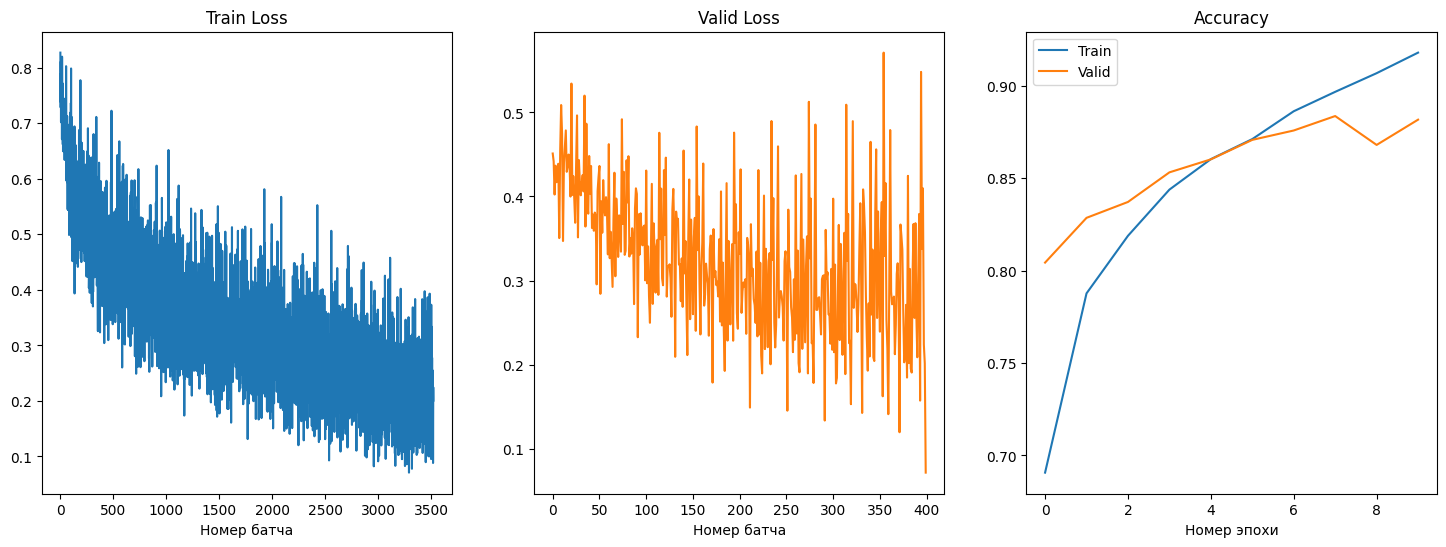

Номер эпохи: 10 | Время обучения эпохи: 0m 9s


In [96]:
FILTER_SIZES = [1, 2, 3]

model_123 = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

optimizer = torch.optim.Adam(model_123.parameters())
criterion = nn.BCEWithLogitsLoss()
model_123 = model_123.to(DEVICE)
criterion = criterion.to(DEVICE)



acc_history_123, val_acc_history_123 = training_loop(model_123)

Качество

In [97]:
model_123.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model_123, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.286 | Test Acc: 88.05%


Теперь рассмотрим лишь фильтры размера 1 и 2.

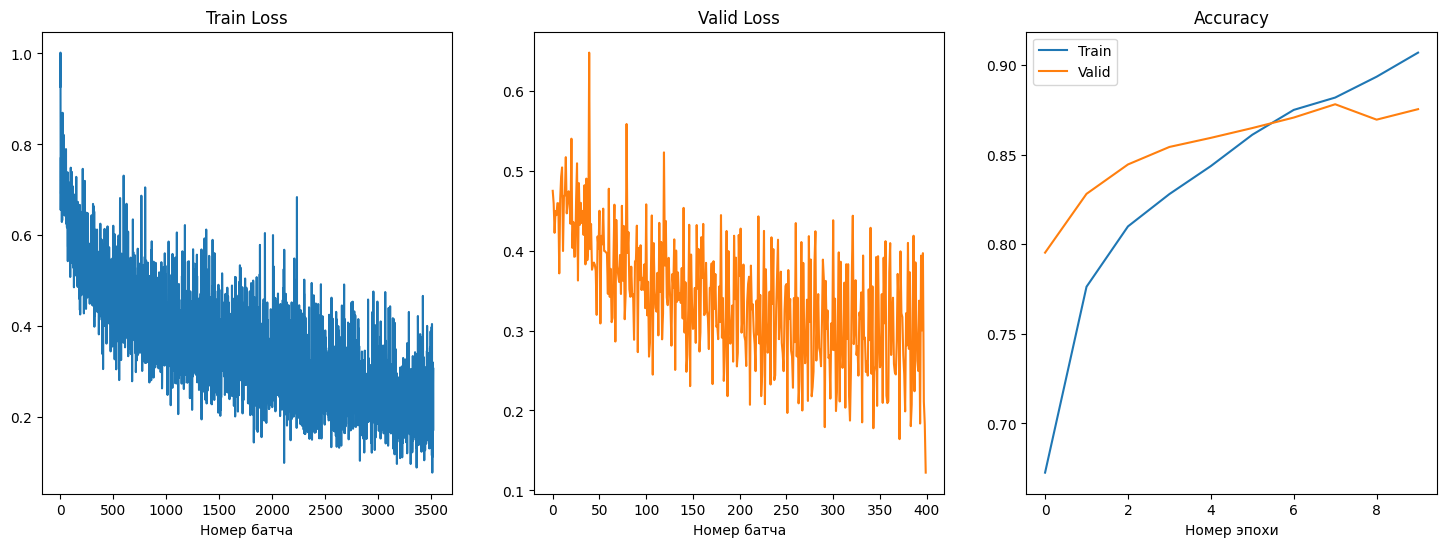

Номер эпохи: 10 | Время обучения эпохи: 0m 6s


In [98]:
FILTER_SIZES = [1, 2]

model_12 = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

optimizer = torch.optim.Adam(model_12.parameters())
criterion = nn.BCEWithLogitsLoss()
model_12 = model_12.to(DEVICE)
criterion = criterion.to(DEVICE)

acc_history_12, val_acc_history_12 = training_loop(model_12)

Качество

In [99]:
model_12.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model_12, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.292 | Test Acc: 87.40%


Сильно ли меняется качество модели для данной задачи? Почему?

Нет. Опять же, задача слишком проста. Поэтому даже размер фильтров не сильно влияет на качество.

Сравнивать модели можно, если строить графики на одном полотне. Снизу иллюстрация. Оно подтверждает, что качество особо не меняется

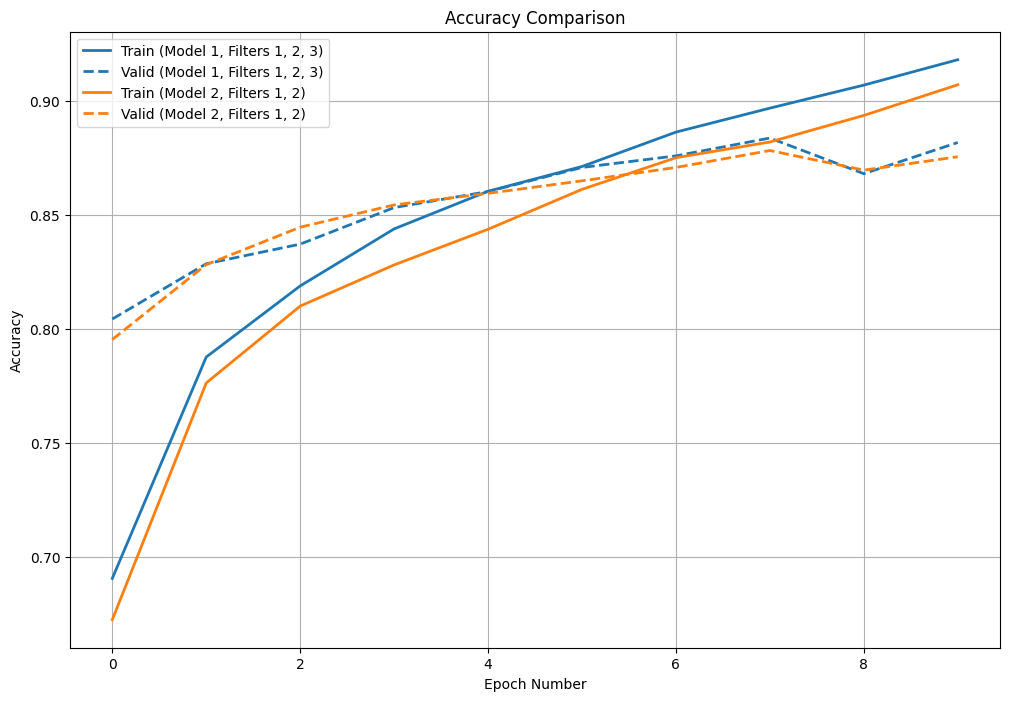

In [107]:
plt.figure(figsize=(12, 8))

plt.plot(acc_history_123, label="Train (Model 1, Filters 1, 2, 3)",
         color='tab:blue', linewidth=2)
plt.plot(val_acc_history_123, label="Valid (Model 1, Filters 1, 2, 3)",
         color='tab:blue', linestyle='--', linewidth=2)
plt.plot(acc_history_12, label="Train (Model 2, Filters 1, 2)",
         color='tab:orange', linewidth=2)
plt.plot(val_acc_history_12, label="Valid (Model 2, Filters 1, 2)",
         color='tab:orange', linestyle='--', linewidth=2)

plt.legend()
plt.grid(True)
plt.title("Accuracy Comparison")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")

plt.show()

__5. Аугментация данных.__

Попробуйте сделать аугментацию текста.

Замените слово на синоним с некоторой вероятностью $p$. То есть с вероятностью $p$ каждое слово будет заменено на некоторый его синоним, а с вероятностью $1 - p$ слово останется как есть.

Обучите модель на таких данных и посмотрите на качество.

In [108]:
def get_synonyms(word):
    """
    Получаем синонимы
    
    """
    synonyms = set()
    
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    
    return list(synonyms)

def augment_text_with_synonyms(text, p=0.3):
    """
    Аугментация текста с заменой слов на синонимы с вероятностью p.
    :param text: Текст для аугментации (строка).
    :param p: Вероятность замены каждого слова на синоним.
    :return: Аугментированный текст.
    """
    words = word_tokenize(text)
    augmented_text = []

    for word in words:
        if random.random() < p:
            synonyms = get_synonyms(word)
            if synonyms:
                augmented_text.append(random.choice(synonyms))
            else:
                augmented_text.append(word)
        else:
            augmented_text.append(word)
    
    return ' '.join(augmented_text)

Теперь нужно аугментировать тексты и занового пересоздать словарь

In [109]:
train_data = [(label, augment_text_with_synonyms(text)) for label, text in train_data]

valid_data = [(label, augment_text_with_synonyms(text)) for label, text in valid_data]

test_dataset = [(label, augment_text_with_synonyms(text)) for label, text in test_dataset]

Пересоздаем словарь

In [110]:
MAX_VOCAB_SIZE = 25000
tokenizer = get_tokenizer("spacy", language="en_core_web_sm")

counter = Counter()
for _, text in train_data:
    counter.update(
        token for token in tokenizer(text) \
        if token not in stop_words and token not in punc
    )

ordered_dict = OrderedDict(counter.most_common(MAX_VOCAB_SIZE))
vocab = torchtext.vocab.vocab(ordered_dict)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1742: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Добавляем токен

In [113]:
unk_token = "<unk>"
vocab.append_token(unk_token)
# используем по умолчанию для токенов вне словаря
vocab.set_default_index(vocab[unk_token])
UNK_IDX = vocab[unk_token]

Новые даталоадеры

In [114]:
train_texts = [vocab(tokenizer(text)) for _, text in train_data]
valid_texts = [vocab(tokenizer(text)) for _, text in valid_data]
test_texts = [vocab(tokenizer(text)) for _, text in test_dataset]

train_loader = DataLoader(
    list(zip(train_texts, train_labels)),
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=pad_collate
)

valid_loader = DataLoader(
    list(zip(valid_texts, valid_labels)),
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=pad_collate
)

test_loader = DataLoader(
    list(zip(test_texts, test_labels)),
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=pad_collate
)

Результаты работы модели

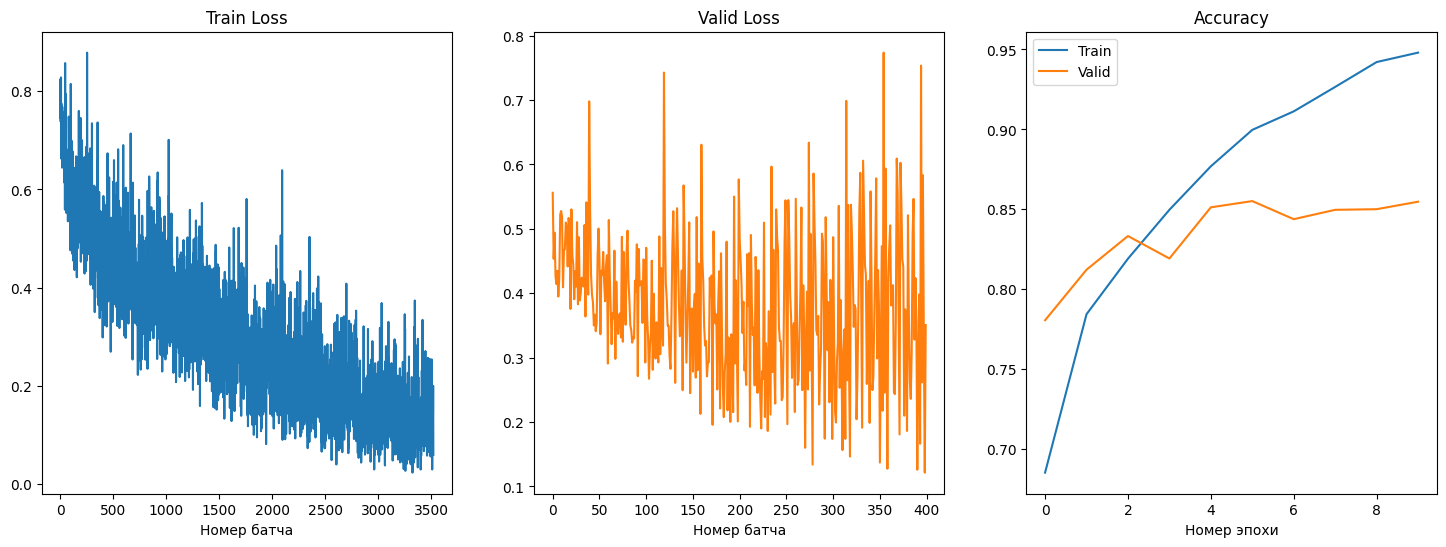

Номер эпохи: 10 | Время обучения эпохи: 0m 28s


([0.6850635258650238,
  0.7842388730496168,
  0.8190054846080866,
  0.8496340357444503,
  0.8768495502458378,
  0.8996656013822014,
  0.911251183768565,
  0.9265555951066993,
  0.9421263415027749,
  0.9480301057073203],
 [0.78046875,
  0.812109375,
  0.833203125,
  0.819140625,
  0.851171875,
  0.855078125,
  0.84375,
  0.849609375,
  0.85,
  0.8546875])

In [116]:
INPUT_DIM = len(vocab)    # размер словаря
EMBEDDING_DIM = 300       # размерность векторов-эмбеддингов
N_FILTERS = 100           # количество свёрточных фильтров
FILTER_SIZES = [3, 4, 5]  # размеры фильтров на каждом уровне
OUTPUT_DIM = 1            # размерность выхода (сеть выдаёт вероятность для одного класса)
DROPOUT = 0.5             # вероятность dropout
PAD_IDX = UNK_IDX         # id токена для паддинга

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

optimizer = torch.optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

training_loop(model)

Итого качество

In [117]:
model.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.325 | Test Acc: 85.80%


На практике аугментация может помочь с переобучением, но эта задача слишком простая, чтобы хоть какие-то изменения существенно влияли на качество получаемых моделей.

В этот раз аугментация лишь несколько ухудшило качество модели